# Final project: BMEN 619.18 Machine Learning for Biomedical Engineers
## Topic: Load detection using physiological data

- Section 1. Read the data anf extract feature
- Section 2. Feature transformation
- Section 3. Machine learning
- Conclusion

Note.
- Section 1 focuses on feature extraction from the data, saving them in separate files (test and train), which can be downloaded for machine learning purposes.

- Sections 2 and 3 are dedicated to features transformation and machine learning tasks.

**The code is designed to be executed either in its entirety or selectively in Section 1 or Sections 2 and 3 separately. To expedite code processing time, running it from Section 2 and 3 exclusively is recommended, as these sections specifically handle machine learning operations.**

# Section 1. Read data and extract features.

### 1.1 Setting Up and Checking Cloud Storage Connection:
The original data can be found at the link (https://www.ubittention.org/2020/data/Cognitive-load%20challenge%20description.pdf). The dataset contains data from 23 participants, 5 for testing and 18 for training. The train and test data was generated using windows of 30 seconds.
The sensor files in the training data (GSR, HR, RR, and ST) contain 632 lines x 30 columns. The sensor files in the test data (GSR, HR, RR, and ST) contain 193 lines x 30 columns, corresponding to 193 instances each containing 30 samples.

- The code begins by setting up the necessary libraries and mounting Google Drive for data storage in the Colab environment.

### 1.2 Loading Sensor Data and Extracting Features:

-  The script reads the data from each of the four sensors (Heart rate, RR, temperature, galvanic skin respond) stored in separate CSV files.
- Tor each sensor, it iterates through the data, extracting both linear and non-linear features from each signal:
    - Min: The smallest value in the signal.
    - Max: The largest value in the signal.
    - Range: The range of the signal, calculated as Max – Min.
    - Q25: The first quartile of the signal, i.e., 25% of the data, is below this value.
    - Q75: The third quartile of the signal, i.e., 75% of the data, is below this value.
    - Mean: The average value of the signal.
    - Median: The middle value of the signal.
    - Standard Deviation: Measures the signal’s variation/dispersion.
    - Variance: The square of the standard deviation.
    - Skewness: Measures the asymmetry of the signal distribution.
    - Kurtosis: Measures the “tailedness” of the signal distribution.
    - Magnitude (mean): The absolute value of the FFT*, representing the contribution of each frequency component to the overall signal.
    - Magnitude (std): The absolute value of the FFT*, representing the contribution of each frequency component to the overall signal.
    - Power: The sum of the squares of the magnitude, representing the total energy in the signal.
    - Entropy: Measures the uncertainty/randomness in the signal.


### 1.3 Combining Features:
- The columns of each DataFrame are renamed to include a suffix indicating the sensor type ('_hr', '_rr', '_temp', '_gsr').
- The features from all four sensors are concatenated into a single DataFrame
- Any columns with names starting with 'Unnamed' are removed for clarity.
-The final combined features for the training set are saved to a CSV file named 'train_feature.csv' OR 'test_feature.csv'.



In [ ]:
###-------------------------------------------------------------------
###-------1.1 Setting Up and Checking Cloud Storage Connection--------
###-------------------------------------------------------------------
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy.stats import skew, kurtosis
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import glob
os.chdir('/content/drive/My Drive/BMEN/train')
df = pd.read_csv('hr_train.csv', header=None)
df.head()

Mounted at /content/drive


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,60.000000,60.666667,61.666667,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,61.666667,61.333333,61.333333,63.000000,64.333333,65.333333,65.333333,65.666667,66.000000
1,75.333333,75.666667,75.333333,75.000000,75.000000,75.000000,74.666667,74.000000,73.666667,73.666667,...,78.333333,77.666667,75.666667,73.666667,72.000000,72.000000,71.666667,71.666667,71.666667,71.666667
2,61.666667,62.333333,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.333333,63.333333,63.000000,63.000000,63.000000,62.333333,61.000000,59.666667,58.666667,58.333333
3,77.333333,76.000000,75.333333,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.333333,...,76.000000,76.000000,75.666667,75.666667,75.333333,75.333333,75.000000,74.000000,72.666667,71.666667
4,76.000000,76.666667,77.333333,77.666667,77.666667,77.333333,76.666667,76.666667,76.333333,76.000000,...,76.333333,76.333333,76.333333,76.000000,75.666667,67.666667,60.000000,52.000000,52.333333,52.666667


In [ ]:
###-------------------------------------------------------------------
###-------1.2 Loading Sensor Data and Extracting Features (TRAIN DATA)
###-------------------------------------------------------------------

feature_names = ['max', 'min', 'range', 'q25', 'q75', 'mean', 'median', 'std_dev', 'variance', 'skewness', 'kurtosis',  'power', 'mean_freq', 'std_dev_freq','entropy']
os.chdir('/content/drive/My Drive/BMEN/train')
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))


for f in csv_files:
      file_name = os.path.basename(f)
      print(f"Processing file: {file_name}")
      data = pd.read_csv(f, header=None)
      features_df = pd.DataFrame()

      for i in range(data.shape[0]):
          signal = data.iloc[i, :]

          # linear features
          mean = np.mean(signal)
          median = np.median(signal)
          std_dev = np.std(signal)
          variance = np.var(signal)
          skewness = skew(signal)
          kurt = kurtosis(signal)
          min = np.min(signal)
          max = np.max(signal)
          max_min = max - min
          q25 = np.quantile(signal, .25)
          q75 = np.quantile(signal, .75)

          # Non-linear features
          fft = fftpack.fft(signal.values)
          magnitude = np.abs(fft)
          mean_freq = np.mean(magnitude)
          std_dev_freq = np.std(magnitude)
          power = np.sum(magnitude**2)
          counts = np.bincount(signal)
          entropy = -np.sum(counts*np.log2(counts + np.finfo(float).eps))

          # save feature for each sensor
          features = [max, min, max_min, q25, q75,mean, median, std_dev, variance, skewness, kurt, power, mean_freq, std_dev_freq,entropy]
          features_df = features_df.append(pd.Series(features, index=feature_names), ignore_index=True)

          name = '/content/drive/My Drive/BMEN/train/feature/' + str(file_name)
          features_df.to_csv(name)


In [ ]:
###-------------------------------------------------------------------
###-------1.3. Combining Features (TRAIN DATA)------------------------
###-------------------------------------------------------------------
os.chdir('/content/drive/My Drive/BMEN/train/feature')
df0 = pd.read_csv('hr_train.csv')
df0.columns = [col + '_hr' for col in df0.columns]

df1 = pd.read_csv('rr_train.csv')
df1.columns = [col + '_rr' for col in df1.columns]

df2 = pd.read_csv('temp_train.csv')
df2.columns = [col + '_temp' for col in df2.columns]

df3 = pd.read_csv('gsr_train.csv')
df3.columns = [col + '_gsr' for col in df3.columns]

# save feature from 4 sensors into 1 file in define order
result = pd.concat([df0, df1, df2, df3], axis=1)
result = result.loc[:, ~result.columns.str.contains('^Unnamed')]
result.to_csv('/content/drive/My Drive/BMEN/train_feature.csv')

In [ ]:
result.head()


,max_hr,min_hr,range_hr,q25_hr,q75_hr,mean_hr,median_hr,std_dev_hr,variance_hr,skewness_hr,...,mean_gsr,median_gsr,std_dev_gsr,variance_gsr,skewness_gsr,kurtosis_gsr,power_gsr,mean_freq_gsr,std_dev_freq_gsr,entropy_gsr
0,66.000000,60.000000,6.000000,61.750000,62.916667,62.511111,62.000000,1.418746,2.012840,1.120521,...,1.629602,1.633575,0.023544,0.000554,-0.206796,-1.525712,2390.542679,1.713499,8.760632,-147.206718
1,80.000000,71.666667,8.333333,73.666667,75.666667,74.933333,74.666667,2.368622,5.610370,0.524260,...,0.574807,0.655739,0.120549,0.014532,-0.897797,-1.006192,310.441713,0.901339,3.087984,-147.206718
2,63.666667,58.333333,5.333333,63.000000,63.000000,62.500000,63.000000,1.313040,1.724074,-2.197244,...,1.020229,1.039323,0.031881,0.001016,-1.113263,-0.037297,937.695222,1.147259,5.471773,-120.767991
3,77.333333,71.666667,5.666667,75.000000,76.000000,75.466667,75.666667,1.156623,1.337778,-1.285676,...,1.507063,1.504966,0.051388,0.002641,0.501507,-1.001993,2046.492721,1.689993,8.084575,-147.206718
4,77.666667,52.000000,25.666667,75.666667,76.666667,73.155556,76.166667,7.696913,59.242469,-2.089684,...,0.378422,0.377606,0.002643,0.000007,0.193260,-1.602708,128.888878,0.386473,2.036402,-147.206718


In [ ]:
###-------------------------------------------------------------------
###-------1.2 Loading Sensor Data and Extracting Features (TEST DATA)-
###-------------------------------------------------------------------
feature_names = ['max', 'min', 'range', 'q25', 'q75', 'mean', 'median', 'std_dev', 'variance', 'skewness', 'kurtosis',  'power', 'mean_freq', 'std_dev_freq','entropy']
os.chdir('/content/drive/My Drive/BMEN/test')
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
for f in csv_files:
      file_name = os.path.basename(f)
      print(f"Processing file: {file_name}")
      data = pd.read_csv(f, header=None)
      features_df = pd.DataFrame()

      for i in range(data.shape[0]):
          signal = data.iloc[i, :]
          # linear features
          mean = np.mean(signal)
          median = np.median(signal)
          std_dev = np.std(signal)
          variance = np.var(signal)
          skewness = skew(signal)
          kurt = kurtosis(signal)
          min = np.min(signal)
          max = np.max(signal)
          max_min = max - min
          q25 = np.quantile(signal, .25)
          q75 = np.quantile(signal, .75)

          # Non-linear features
          fft = fftpack.fft(signal.values)
          magnitude = np.abs(fft)
          mean_freq = np.mean(magnitude)
          std_dev_freq = np.std(magnitude)
          power = np.sum(magnitude**2)
          counts = np.bincount(signal)
          entropy = -np.sum(counts*np.log2(counts + np.finfo(float).eps))


          # save feature for each sensor
          features = [max, min, max_min, q25, q75,mean, median, std_dev, variance, skewness, kurt, power, mean_freq, std_dev_freq,entropy]
          features_df = features_df.append(pd.Series(features, index=feature_names), ignore_index=True)
          name = '/content/drive/My Drive/BMEN/test/feature/' + str(file_name)
          features_df.to_csv(name)


In [ ]:
###-------------------------------------------------------------------
###-------1.3. Combining Features (TEST DATA)-------------------------
###-------------------------------------------------------------------

os.chdir('/content/drive/My Drive/BMEN/test/feature')

df0 = pd.read_csv('hr_test.csv')
df0.columns = [col + '_hr' for col in df0.columns]

df1 = pd.read_csv('rr_test.csv')
df1.columns = [col + '_rr' for col in df1.columns]

df2 = pd.read_csv('temp_test.csv')
df2.columns = [col + '_temp' for col in df2.columns]

df3 = pd.read_csv('gsr_test.csv')
df3.columns = [col + '_gsr' for col in df3.columns]

result_test = pd.concat([df0, df1, df2, df3], axis=1)
result_test = result_test.loc[:, ~result_test.columns.str.contains('^Unnamed')]
result_test.to_csv('/content/drive/My Drive/BMEN/test_feature.csv')

In [ ]:
result_test.head()

,max_hr,min_hr,range_hr,q25_hr,q75_hr,mean_hr,median_hr,std_dev_hr,variance_hr,skewness_hr,...,mean_gsr,median_gsr,std_dev_gsr,variance_gsr,skewness_gsr,kurtosis_gsr,power_gsr,mean_freq_gsr,std_dev_freq_gsr,entropy_gsr
0,68.000000,59.666667,8.333333,61.666667,63.916667,62.988889,62.500000,1.989758,3.959136,0.740626,...,6.361656,6.369427,0.041047,0.001685,0.162681,-0.522324,36425.121569,6.536895,34.226302,-147.206718
1,84.333333,81.333333,3.000000,82.000000,83.250000,82.633333,82.333333,0.916313,0.839630,0.450974,...,1.753702,1.753502,0.037065,0.001374,-0.085275,-1.659129,2769.161123,1.848494,9.428067,-147.206718
2,80.666667,68.666667,12.000000,71.750000,76.333333,74.144444,73.666667,3.449834,11.901358,0.461596,...,2.303551,2.296238,0.064840,0.004204,0.226970,-1.138658,4779.494448,2.560051,12.359718,-147.206718
3,74.333333,58.666667,15.666667,59.666667,68.000000,63.722222,61.666667,5.007464,25.074691,0.909027,...,2.804103,2.803743,0.005370,0.000029,0.695900,0.138202,7076.721446,2.824389,15.096806,-147.206718
4,73.333333,64.333333,9.000000,67.666667,70.666667,68.533333,68.333333,2.468468,6.093333,0.138070,...,3.215263,3.302151,0.176913,0.031298,-0.418752,-1.223124,9332.295156,3.758136,17.232322,-125.548875


So, Section 1. loads, processes, and combines the features from the four sensors for both the training and test sets. It ensures the order of data is preserved during the feature extraction and combination processes. The final feature sets are saved to 'train_feature.csv' and 'test_feature.csv'.

# Section 2. Feature transformation

### 2.1 Reading Training and Testing Samples
- Reads the training and testing samples along with their corresponding labels.
- Verifies that the dimensions of the features and labels match.
- Checks for and replaces any NaN values within the data with zeros.
- Eliminates any unnecessary columns that might have been introduced during the data-saving process.
- Verifies that there are no duplicated column names, ensuring proper functionality of algorithms.

### 2.2. Data transformation
- Applies min-max normalization to scale the features within a specific range.
- Standardizes the data to have a mean of zero and a standard deviation of one.
- Uses PCA to reduce the dimensionality of the data while retaining 95% of the explained variance.
- Confirms that 16 principal components explain 95% of the variance in the data.

### Therefore, the outcome of this section yields four feature types:

- Raw form features
- Normalized features
- Standardized features
- PCA-transformed features (with 16 principal components explaining 95% of the variance)

In [ ]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy.stats import skew, kurtosis
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import glob

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
###-------------------------------------------------------------------
###-------2.1.  Reading Training and Testing Samples------------------
###-------------------------------------------------------------------

#---TRAIN------

os.chdir('/content/drive/My Drive/BMEN/train/labels')
y_train = pd.read_csv('labels_train.csv', header=None)
y_train = y_train[0]

os.chdir('/content/drive/My Drive/BMEN/')
X_train = pd.read_csv('train_feature.csv')
#removing unnecessary columns
X_train = X_train.loc[:, ~X_train.columns.str.contains('^Unnamed')]
#Replacing the missing values with zeros
X_train = X_train.fillna(0)


#---TEST-------

os.chdir('/content/drive/My Drive/BMEN/test/labels')
y_test = pd.read_csv('labels_test_rand.csv', header=None)
y_test = y_test[0]

os.chdir('/content/drive/My Drive/BMEN/')
X_test = pd.read_csv('test_feature.csv')
X_test = X_test.loc[:, ~X_test.columns.str.contains('^Unnamed')]
X_test = X_test.fillna(0)



It is crucial to verify that the dimensions of the features and labels are consistent. Mismatched dimensions could lead to errors during training or testing, as the model may expect a certain number of labels corresponding to the number of features.

In [ ]:
#Dimension Consistency
print('Train: ', len(X_train),', lable:', len(y_train))
print('Test: ', len(X_test),', lable:', len(y_test))

Train:  632 , lable: 632
Test:  193 , lable: 193


Duplicate column names can lead to ambiguity and errors in data processing. Using the code below, we ensure each feature has a unique name

In [ ]:
feature_names = X_train.columns.tolist()
feature_count = {}

# Iterate through the feature names and rename duplicates
for i in range(len(feature_names)):
    current_feature = feature_names[i]
    if feature_names.count(current_feature) > 1:
        if current_feature in feature_count:
            feature_count[current_feature] += 1
        else:
            feature_count[current_feature] = 1
        feature_names[i] = f'{current_feature}_{feature_count[current_feature]}'
X_test.columns = feature_names
X_train.columns = feature_names

In [ ]:
###-------------------------------------------------------------------
###-------2.2. Data transformation------------------------------------
###-------------------------------------------------------------------

from tqdm import tqdm
from scipy.signal import savgol_filter

# Min-Max normalization
def max_min_scaler(data):
    mx = np.max(data)
    mn = np.min(data)

    if mx-mn == 0:
        scaled = np.zeros((len(data),))
    else:
        scaled = (data-mn)/(mx-mn)

    return scaled

# Standardization
def standardize(data):

    average = np.mean(data)
    deviation = np.std(data)

    standard = (data-average)/deviation

    return standard

- Min-Max normalization scales the features to a specific range, between 0 and 1. This process ensures that all features contribute proportionally to the model training, preventing any particular feature from dominating due to a larger scale.
- Standardization transforms the data with a mean of zero and a standard deviation of one. Features have different scales, as it brings them onto a standard scale, facilitating model convergence and improving the interpretability of feature importance.

In [ ]:
X_train_norn = X_train.apply(max_min_scaler)
X_test_norn = X_test.apply(max_min_scaler)

X_test_stand = X_test.apply(standardize)
X_train_stand = X_train.apply(standardize)

In [ ]:
X_test_stand.head()

,max_hr,min_hr,range_hr,q25_hr,q75_hr,mean_hr,median_hr,std_dev_hr,variance_hr,skewness_hr,...,mean_gsr,median_gsr,std_dev_gsr,variance_gsr,skewness_gsr,kurtosis_gsr,power_gsr,mean_freq_gsr,std_dev_freq_gsr,entropy_gsr
0,-0.946851,-0.981334,0.156469,-0.999720,-1.177917,-1.085560,-1.144108,-0.268765,-0.372819,0.916046,...,0.921160,0.928689,-0.199957,-0.185696,-0.111935,-0.223308,0.747795,0.858270,0.922282,-0.435164
1,0.912059,1.399182,-1.206511,1.308405,1.083037,1.206510,1.178491,-1.074056,-0.721975,0.467027,...,-0.947512,-0.946615,-0.231223,-0.188743,-0.382715,-0.721923,-0.837335,-0.960359,-0.946760,-0.435164
2,0.494753,0.007495,1.093518,0.144883,0.274161,0.216045,0.163574,0.826575,0.516129,0.483493,...,-0.724531,-0.726118,-0.013147,-0.161023,-0.041729,-0.493639,-0.742652,-0.684347,-0.725802,-0.435164
3,-0.226049,-1.091204,2.030567,-1.226749,-0.700388,-0.999997,-1.241696,1.995098,1.990578,1.177103,...,-0.521541,-0.519935,-0.480067,-0.201914,0.470365,0.066407,-0.634457,-0.581810,-0.519508,-0.435164
4,-0.339860,-0.468608,0.326842,-0.318634,-0.388532,-0.438647,-0.460990,0.090360,-0.133945,-0.018037,...,-0.354802,-0.317448,0.866776,0.104316,-0.746887,-0.530687,-0.528224,-0.219610,-0.358554,1.609499


PCA is employed to reduce the dimensionality of the dataset while retaining most of its variance. This is achieved by transforming the original features into a new set of uncorrelated variables (principal components). In this case, the goal is to reduce the dimensionality to preserve 95% of the variance, providing a more concise representation of the data.



Number of components needed to explain 95% variance: 16


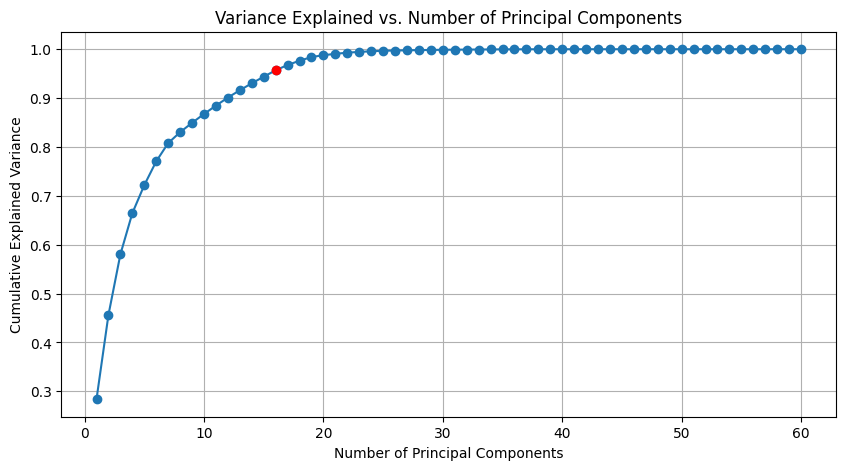

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=60)

principalComponents = pca.fit_transform(X_train_stand)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_range = np.arange(1, len(cumulative_variance) + 1)
components_80_variance = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f'Number of components needed to explain 95% variance: {components_80_variance}')


plt.figure(figsize=(10, 5))
plt.plot(n_components_range, cumulative_variance, 'o-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained vs. Number of Principal Components')

num_components = np.argmax(cumulative_variance >= 0.95) + 1
plt.plot(num_components, cumulative_variance[num_components - 1], 'ro')
plt.grid(True)

 In this case, 16 principal components effectively capture 95% of the data's variance.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_stand)
num_components = pca.n_components_
print(f'Number of Principal Components: {num_components}')

# Transform the training and test data
X_train_pca = pca.transform(X_train_stand)
X_test_pca = pca.transform(X_test_stand)


Number of Principal Components: 16


Therefore, the outcome of this section yields four distinct sets of data:

- Raw form features
- Normalized features
- Standardized features
- PCA-transformed features (with 16 principal components explaining 95% of the variance)

# Section 3. Machine learning

Four different classifiers were employed for data analysis:
- Naïve Bayes,
- XGBoost,
- Logistic Regression,
- Multiple Layer Perceptron

To evaluate their performance, the metrics "Accuracy," "Precision," "Recall," and "F1 Score" were considered.

### 3.1 Naïve Bayes
- Naïve Bayes (probabilistic algorithm) served as a baseline for all four types of data: raw features, normalized, standardized, and PCA-transformed.

### 3.2 XGBoost
- Ensemble learning algorithm XGBoost was applied across all types of data.
- The algorithm hyperparameter was tuned for each data type (max_depth, learning_rate, n_estimators).  

### 3.3 Logistic Regression
- Logistic Regression (linear modeling) was applied to all data types.
- The algorithm hyperparameter was tuned for each data type (penalty, C, solver, max_iter).

### 3.4 MLP
- The algorithm hyperparameter was tuned for standatrize features (hidden size).

In [ ]:
# The evaluation criteria included key metrics "Accuracy," "Precision," "Recall," and "F1 Score," providing an assessment of classifier performance.

def evaluate_model(model, x_test, y_test):
    from sklearn import metrics
    y_pred = model.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1}

Naïve Bayes was utilized for all four types of data: raw features, normalized features, standardized features, and PCA-transformed features. Based on Bayes' theorem, this probabilistic algorithm has proven effective for various classification tasks.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb_raw = GaussianNB()
gnb_raw.fit(X_train, y_train)
nb_raw = evaluate_model(gnb_raw, X_test, y_test)

gnb_norm = GaussianNB()
gnb_norm.fit(X_train_norn, y_train)
nb_norm = evaluate_model(gnb_norm, X_test_norn, y_test)

gnb_stand = GaussianNB()
gnb_stand.fit(X_train_stand, y_train)
nb_stand = evaluate_model(gnb_stand, X_test_stand, y_test)

gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train)
nb_pca = evaluate_model(gnb_pca, X_test_pca, y_test)


In [ ]:
print ('RAW: ')
print('Raw Naive:   acc: {:.4f}, prec: {:.4f}, rec: {:.4f}, f1: {:.4f}\n'.format(nb_raw['acc'],  nb_raw['prec'],  nb_raw['rec'],  nb_raw['f1']))

print ('NORM: ')
print('Norm Naive:  acc: {:.4f}, prec: {:.4f}, rec: {:.4f}, f1: {:.4f}\n'.format(nb_norm['acc'], nb_norm['prec'], nb_norm['rec'], nb_norm['f1']))

print ('STAND: ')
print('Stand Naive: acc: {:.4f}, prec: {:.4f}, rec: {:.4f}, f1: {:.4f}\n'.format(nb_stand['acc'],nb_stand['prec'],nb_stand['rec'],nb_stand['f1']))

print ('PCA: ')
print('PCA Naive: acc:   {:.4f}, prec: {:.4f}, rec: {:.4f}, f1: {:.4f}\n'.format(nb_pca['acc'],  nb_pca['prec'],  nb_pca['rec'],  nb_pca['f1']))

RAW: 
Raw Naive:   acc: 0.5130, prec: 0.5028, rec: 0.9579, f1: 0.6594

NORM: 
Norm Naive:  acc: 0.5907, prec: 0.6111, rec: 0.4632, f1: 0.5269

STAND: 
Stand Naive: acc: 0.6166, prec: 0.7059, rec: 0.3789, f1: 0.4932

PCA: 
PCA Naive: acc:   0.5699, prec: 0.6071, rec: 0.3579, f1: 0.4503



The XGBoost algorithm is a powerful ensemble learning technique. Known for its scalability and high performance, XGBoost underwent hyperparameter tuning for each data representation.

 Key hyperparameters include:
- max_depth: The maximum depth of a tree in the ensemble.
- learning_rate: A step size shrinkage to prevent overfitting.
- n_estimators: The number of boosting rounds (trees in the ensemble).

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


In [ ]:

# param_grid = {
#     'max_depth': [1, 2],
#     'learning_rate': [0.1],
#     'n_estimators': [100, 150]
# }
param_grid = {
    'max_depth': [1, 2, 3, 5],
    'learning_rate': [1, 0.1, 0.01, 0.001],
    'n_estimators': [100, 150, 200, 300]
}

def XGBoostGrid(train_X, y_train, test_X, y_test):

    # Tune hyperparamethers
    classifier = xgb.XGBClassifier()
    grid_search = 32(estimator=classifier, param_grid=param_grid, cv=5)
    grid_search.fit(train_X, y_train)

    #the best parameters
    best_params = grid_search.best_params_
    print ('Best paramethers: ', best_params)

    # Fit classifier with the best parameters
    classifier_best = xgb.XGBClassifier(**best_params)
    classifier_best.fit(train_X, y_train)
    eval_best = evaluate_model(classifier_best, test_X, y_test)

    return eval_best, best_params

XGboost_raw, param11 = XGBoostGrid(X_train, y_train, X_test, y_test)
XGboost_norm, param12 = XGBoostGrid(X_train_norn,y_train, X_test_norn, y_test)
XGboost_stand, param13 = XGBoostGrid(X_train_stand, y_train, X_test_stand, y_test)
XGboost_pca, param14 = XGBoostGrid(X_train_pca, y_train, X_test_pca, y_test)

Best paramethers:  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 150}
Best paramethers:  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 150}
Best paramethers:  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 150}
Best paramethers:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 300}


In [ ]:
print ('RAW: ')
print ('Best paramethers: ', param11)
print('Raw XGB: acc: {:.4f}, prec: {:.4f}, rec: {:.4f}, f1: {:.4f}\n'.format(XGboost_raw['acc'], XGboost_raw['prec'],XGboost_raw['rec'],XGboost_raw['f1']))

print ('NORM: ')
print ('Best paramethers: ', param12)
print('Norm XGB: acc: {:.4f}, prec: {:.4f}, rec: {:.4f}, f1: {:.4f}\n'.format(XGboost_norm['acc'], XGboost_norm['prec'],XGboost_norm['rec'],XGboost_norm['f1']))

print ('STAND: ')
print ('Best paramethers: ', param13)
print('Stand XGB: acc: {:.4f}, prec: {:.4f}, rec: {:.4f}, f1: {:.4f}\n'.format(XGboost_stand['acc'], XGboost_stand['prec'],XGboost_stand['rec'],XGboost_stand['f1']))

print ('PCA: ')
print ('Best paramethers: ', param14)
print('PCA XGB: acc: {:.4f}, prec: {:.4f}, rec: {:.4f}, f1: {:.4f}\n'.format(XGboost_pca['acc'], XGboost_pca['prec'],XGboost_pca['rec'],XGboost_pca['f1']))

Logistic Regression is a linear model suitable for binary classification. Similar to XGBoost, hyperparameter tuning was conducted to optimize its performance for each data representation.

Key hyperparameters include

- penalty: The regularization term to prevent overfitting.
- C: The inverse of regularization strength.
- solver: The algorithm used for optimization.
- max_iter: The maximum number of iterations for optimization convergence.

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'max_iter': [50, 100, 200, 300]
}

def LogGrid(train_X, y_train, test_X, y_test):

    # Tune hyperparamethers
    classifier = LogisticRegression()
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)
    grid_search.fit(train_X, y_train)

    #the best parameters
    best_params = grid_search.best_params_
    print ('Best paramethers: ', best_params)

    # Fit classifier with the best parameters
    classifier_best = LogisticRegression(**best_params)
    classifier_best.fit(train_X, y_train)
    eval_best = evaluate_model(classifier_best, test_X, y_test)

    return eval_best, best_params

log_raw, param1 = LogGrid(X_train, y_train, X_test, y_test)
log_norm, param2 = LogGrid(X_train_norn,y_train, X_test_norn, y_test)
log_stand, param3 = LogGrid(X_train_stand, y_train, X_test_stand, y_test)
log_pca, param4 = LogGrid(X_train_pca, y_train, X_test_pca, y_test)


In [ ]:
print ('RAW: ')
print ('Best paramethers: ', param1)
print('Raw Log: acc: {:.4f}, prec: {:.4f}, rec: {:.4f}, f1: {:.4f}\n'.format(log_raw['acc'], log_raw['prec'],log_raw['rec'],log_raw['f1']))

print ('NORM: ')
print ('Best paramethers: ', param2)
print('Norm Log: acc: {:.4f}, prec: {:.4f}, rec: {:.4f}, f1: {:.4f}\n'.format(log_norm['acc'], log_norm['prec'],log_norm['rec'],log_norm['f1']))

print ('STAND: ')
print ('Best paramethers: ', param3)
print('Stand Log: acc: {:.4f}, prec: {:.4f}, rec: {:.4f}, f1: {:.4f}\n'.format(log_stand['acc'], log_stand['prec'],log_stand['rec'],log_stand['f1']))

print ('PCA: ')
print ('Best paramethers: ', param4)
print('PCA Log: acc: {:.4f}, prec: {:.4f}, rec: {:.4f}, f1: {:.4f}\n'.format(log_pca['acc'], log_pca['prec'],log_pca['rec'],log_pca['f1']))

RAW: 
Best paramethers:  {'C': 100, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
Raw Log: acc: 0.6269, prec: 0.6264, rec: 0.6000, f1: 0.6129

NORM: 
Best paramethers:  {'C': 1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
Norm Log: acc: 0.6528, prec: 0.6795, rec: 0.5579, f1: 0.6127

STAND: 
Best paramethers:  {'C': 100, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
Stand Log: acc: 0.6062, prec: 0.6000, rec: 0.6000, f1: 0.6000

PCA: 
Best paramethers:  {'C': 0.1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
PCA Log: acc: 0.6528, prec: 0.6750, rec: 0.5684, f1: 0.6171



A Multilayer Perceptron model is utilized by PyTorch for binary classification. The dataset is standardized, converted into PyTorch tensors, and used to train the MLP model with varying hidden layer sizes.

- The model consists of an input layer, a ReLU activation function, and an output layer with a sigmoid activation function. The Binary Cross Entropy Loss is used as the loss function. The Adam optimizer is employed for model parameter optimization.

- Also, Early stopping is implemented to monitor the test loss, and training stops if no improvement is observed for a predefined number of epochs (3).

In [ ]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)

X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)




In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Ensure it's a column vector

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        # self.fc2 = nn.Linear(hidden_size, hidden_size)
        # self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        # x = self.fc2(x)
        # x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
input_size = X_train_tensor.shape[1]
output_size = 1


hidden_sizes = [32, 64, 128, 256]

for hidden_size in hidden_sizes:
      print(f"\n\nTraining model with hidden size: {hidden_size}")
      model = MLP(input_size, hidden_size, output_size)

      criterion = nn.BCELoss()
      optimizer = optim.Adam(model.parameters(), lr=0.001)

      train_losses2 = []
      test_losses2 = []
      num_epochs = 50
      batch_size = 64
      patience = 3
      best_test_loss  = float('inf')
      counter = 0

      for epoch in range(num_epochs):
          model.train()
          total_loss = 0.0
          # Training the model
          for i in range(0, len(X_train_tensor), batch_size):
              inputs = X_train_tensor[i:i+batch_size]
              labels = y_train_tensor[i:i+batch_size]

              optimizer.zero_grad()
              outputs = model(inputs)
              loss = criterion(outputs, labels)
              loss.backward()
              optimizer.step()

              total_loss += loss.item()

          avg_loss2 = total_loss / (len(X_train_tensor))
          train_losses2.append(avg_loss2)
          # Evaluate the model on the test set

          model.eval()
          with torch.no_grad():
              test_loss = 0.0
              correct = 0
              total = 0
              predicted_labels = []
              true_labels = []
              for i in range(0, len(X_test_tensor), batch_size):
                  inputs = X_test_tensor[i:i+batch_size]
                  labels = y_test_tensor[i:i+batch_size]

                  outputs = model(inputs)
                  loss = criterion(outputs, labels)
                  test_loss += loss.item()

                  predicted = (outputs >= 0.5).float()
                  predicted_labels.extend(predicted.cpu().numpy())
                  true_labels.extend(labels.cpu().numpy())
                  correct += (predicted == labels).sum().item()
                  total += labels.size(0)

              accuracy = correct / total
              avg_loss_test2 = test_loss/len(X_test_tensor)
              test_losses2.append(test_loss/len(X_test_tensor))

              precision = precision_score(true_labels, predicted_labels)
              recall = recall_score(true_labels, predicted_labels)
              f1 = (2*precision*recall)/(precision+recall)
              print('Epoch {}: Train Loss: {:.4f}, Test Loss: {:.4f}, Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}'.format(epoch + 1, avg_loss2, avg_loss_test2, accuracy, precision, recall, f1))



              if test_loss < best_test_loss:
                  best_test_loss = test_loss
                  counter = 0
              else:
                  counter += 1
                  if counter >= patience:
                      print(f'Early stopping at epoch {epoch+1} due to no improvement in test loss.')
                      break



<ipython-input-50-e306c79d731e>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Ensure it's a column vector
<ipython-input-50-e306c79d731e>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)




Training model with hidden size: 32
Epoch 1: Train Loss: 0.0108, Test Loss: 0.0134, Accuracy: 0.6684, Precision: 0.6782, Recall: 0.6211, F1: 0.6484
Epoch 2: Train Loss: 0.0106, Test Loss: 0.0132, Accuracy: 0.6891, Precision: 0.7108, Recall: 0.6211, F1: 0.6629
Epoch 3: Train Loss: 0.0105, Test Loss: 0.0130, Accuracy: 0.6839, Precision: 0.7179, Recall: 0.5895, F1: 0.6474
Epoch 4: Train Loss: 0.0104, Test Loss: 0.0129, Accuracy: 0.6788, Precision: 0.7200, Recall: 0.5684, F1: 0.6353
Epoch 5: Train Loss: 0.0103, Test Loss: 0.0128, Accuracy: 0.6736, Precision: 0.7162, Recall: 0.5579, F1: 0.6272
Epoch 6: Train Loss: 0.0102, Test Loss: 0.0126, Accuracy: 0.6684, Precision: 0.7067, Recall: 0.5579, F1: 0.6235
Epoch 7: Train Loss: 0.0101, Test Loss: 0.0125, Accuracy: 0.6632, Precision: 0.6974, Recall: 0.5579, F1: 0.6199
Epoch 8: Train Loss: 0.0100, Test Loss: 0.0124, Accuracy: 0.6580, Precision: 0.6933, Recall: 0.5474, F1: 0.6118
Epoch 9: Train Loss: 0.0099, Test Loss: 0.0123, Accuracy: 0.6528, 

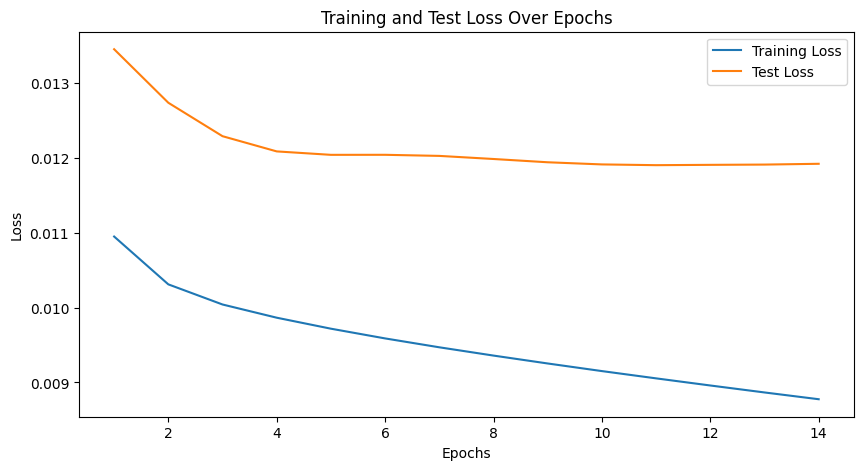

In [ ]:
epochs = np.arange(1, len(train_losses2) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses2, label='Training Loss')
plt.plot(epochs, test_losses2, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Conclusion

| Model Type   | Data Type   | Accuracy | Precision | Recall | F1-score |
|--------------|-------------|----------|-----------|--------|----------|
| **Naïve Bayes**| Raw       | 0.5130   | 0.5028    | 0.9579 | 0.6594   |
|                | Normalized       | 0.5907   | 0.6111    | 0.4632 | 0.5269   |
|                | Standardized     | 0.6166   | 0.7059    | 0.3789 | 0.4932   |
|                | PCA              | 0.5699   | 0.6071    | 0.3579 | 0.4503   |
|--------------|-------------|----------|-----------|--------|----------|
| **XGBoost**    | Raw              | 0.6477   | 0.6337    | 0.6737 | 0.6531   |
|                | Normalized       | 0.6477   | 0.6667    | 0.5684 | 0.6136   |
|                | Standardized     | 0.6684   | 0.6449    | 0.7263 | 0.6832   |
|                | PCA              | **0.6943**   | 0.6607    | 0.7789 | 0.7150   |
|--------------|-------------|----------|-----------|--------|----------|
| **Logistic Regression**|Raw       | 0.6269   | 0.6264    | 0.6000 | 0.6129   |
|                        |Normalized| 0.6528   | 0.6795    | 0.5579 | 0.6127   |
|                      |Standardized| 0.6062   | 0.6000    | 0.6000 | 0.6000   |
|                        | PCA      | 0.6528   | 0.6750    | 0.5684 | 0.6171   |
|--------------|-------------|----------|-----------|--------|----------
| **MLP**        | Hidden Size 32   | 0.6580   | 0.6747    | 0.5895 | 0.6292   |
|                | Hidden Size 64   | 0.6632   | 0.6705    | 0.6211 | 0.6448   |
|                | Hidden Size 128  | 0.6684   | 0.6782    | 0.6211 | 0.6484   |
|                | Hidden Size 256  | 0.6425   | 0.6444    | 0.6105 | 0.6270   |


- Naïve Bayes:
  - Performance is relatively low across all data types.
  - Standardized data shows the highest accuracy, but precision and recall are not balanced.
  - PCA representation does not significantly improve performance.

- XGBoost:
  - Performs well across all data types.
  - Standardized features show improved precision and recall.
  - PCA representation enhances accuracy, precision, recall, and F1-score significantly.

- Logistic Regression:
  - Moderate performance, with the highest accuracy observed for normalized and PCA features.
  - Standardized features show slightly lower performance.

- Multilayer Perceptron:
  - Performance varies with hidden layer size.
  - Hidden sizes 128 and 64 perform well across metrics, achieving balanced accuracy, precision, recall, and F1 score.
  - Hidden sizes 32 and 256 show slightly lower performance.
  

  Our research demonstrates successful load detection using ML techniques, particularly with the XGBoost. Incorporating data transformation methods, such as PCA, standardization, and normalization, yields better results than raw data.
  - Limitation: Data collection protocols notably influence the performance of our classifier. Our findings are based on data collected in case-study scenarios rather than real-world situations.